In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Test function

In [ ]:
from project1 impor

[[ 1.82188229e-01 -8.70582847e+01  1.76406813e+03 -1.33953159e+04
   4.73616914e+04 -6.29159147e+04 -8.04636632e+04  4.07726832e+05
  -5.93592085e+05  3.97490496e+05 -1.03904703e+05]]


-0.0029991922549291727

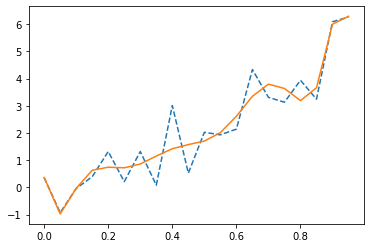

In [247]:
%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X, ds = make_design_matrix(xvec = xvec, deg = 10)

z = test_func(**{'x0':x})
znoisy = z + np.random.normal(0,1,size=z.shape)
betahat = np.array([np.linalg.inv(X[i]@X[i].T)@X[i]@znoisy for i in range(X.shape[0])])
print(betahat)
plt.plot(x, znoisy, linestyle = 'dashed')
plt.plot(x, np.sum(np.array([X[i].T@betahat[i] for i in range(X.shape[0])] ), axis=0))
#plt.plot(x, (znoisy-X[i].T@betahat))
np.mean(znoisy-X[0].T@betahat[0])

In [348]:
%matplotlib qt
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y

X, ds = make_design_matrix(xvec = np.array([x, y]), deg = 10)
z = test_func_2(**{'x0':x,'x1':y})
znoisy = z + np.random.normal(0,1,size=z.shape)
XT = np.transpose(X, tuple([i for i in range(len(X.shape)-2)] + [-1,-2]))
A = np.linalg.pinv(XT@X)@XT
betahat = A@znoisy
print(betahat.shape, X.shape)
print(np.sum(X@betahat, axis = (-2,-1)).shape)
znoisy_tilde = np.sum(X@betahat, axis = (-2,-1))
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy, cmap=cm.viridis)
#ax.plot_surface(x,y,znoisy_tilde, cmap=cm.coolwarm)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 11)

In [352]:
X.shape, XT.shape, (np.linalg.pinv(XT@X)@XT).shape


((10, 10, 11, 2), (10, 10, 2, 11), (10, 10, 2, 11))

In [161]:
import xarray as xr
x, y = np.arange(0,1,0.05), np.arange(0,1,0.05)
x, y = np.meshgrid(x,y)
X, ds = make_design_matrix(xvec = np.array([x, y]), deg = 4)

In [170]:
%matplotlib qt
import project1;import importlib; importlib.reload(project1);from project1 import *
x, y = np.arange(0,1,0.05), np.arange(0,1,0.05)
x, y = np.meshgrid(x,y)
X, ds = make_design_matrix(xvec = np.array([x, y]), deg = 4)
z = FrankeFunction(**{'x0':x,'x1':y})
betahat = np.array([np.array([np.linalg.pinv(X[var, deg]@X[var, deg].T)@X[var, deg]@z for var in range(len(X))]) for deg in range(X.shape[1])])
print(betahat.shape)
#ztilde = np.sum(np.array([[X[var,deg].T*betahat[deg, var] for deg in range(X.shape[1])] for var in range(X.shape[0])]), axis = (0,1))
ztilde = np.sum(np.array([[X[:,:,i,j]@betahat[:,:,i,j] for i in range(X.shape[-2])] for j in range(X.shape[-1])]), axis=(-2,-1))

ztilde
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.plot_surface(x,y,ztilde, cmap=cm.viridis)

(5, 2, 20, 20)


In [171]:
ds

<xarray.Dataset>
Dimensions:        (vars: 2, deg: 5, nx0: 20, nx1: 20)
Coordinates:
    x0             (nx0, nx1) float64 0.0 0.05 0.1 0.15 ... 0.8 0.85 0.9 0.95
    x1             (nx0, nx1) float64 0.0 0.0 0.0 0.0 ... 0.95 0.95 0.95 0.95
Dimensions without coordinates: vars, deg, nx0, nx1
Data variables:
    design_matrix  (vars, deg, nx0, nx1) float64 2.0 2.0 2.0 ... 0.8145 0.8145

In [198]:
np.array([[ds['design_matrix'].isel(vars = int(i), deg = int(j)).data.T for i in ds.vars] for j in ds.deg]).shape

(5, 2, 20, 20)

In [180]:
xxtinv = np.linalg.pinv(ds['design_matrix'].data.T@ds['design_matrix'].data)
ds['betahat'] = (['var']+['nx%i' for i in range(X.shape[0])], xxtinv@ds['design_matrix'].data.T)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 20 is different from 2)

# Franke function

In [ ]:
x, y = np.arange(0,1,0.05),np.arange(0,1,0.05)
xvec = np.array([x,y])
deg = 2

znoisy_tilde, X, noise = ols_fp(xvec = xvec)

dummy = x.copy()
dummy2 = x.copy()
x,y = np.meshgrid(x,y)
znoisy_tilde, _ = np.meshgrid(znoisy_tilde, dummy)
z, _ = np.meshgrid(z, dummy2)
#plot it
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))

ax.plot_surface(x,y,FrankeFunction(x,y), cmap=cm.coolwarm)
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.coolwarm)
ax.view_init(0,45)

In [ ]:
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.05),np.arange(0,1,0.05)
dummy = x.copy()
znoisy_tilde, X, noise = ols_fp(xvec = np.array([x, y]))
x,y = np.meshgrid(x,y)
znoisy_tilde, _ = np.meshgrid(znoisy_tilde, dummy)

#plot it
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
fig, ax = plot_surface(x,y, fig = fig, ax = ax)
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.coolwarm)
ax.view_init(10,60)